<a href="https://colab.research.google.com/github/szm7/AML/blob/main/2348551_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [68]:
data = pd.read_csv("/content/Program_1_Dataset.csv")

In [69]:
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [70]:
data.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [71]:
df = data[['Avg_rooms ', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres','MValue']]

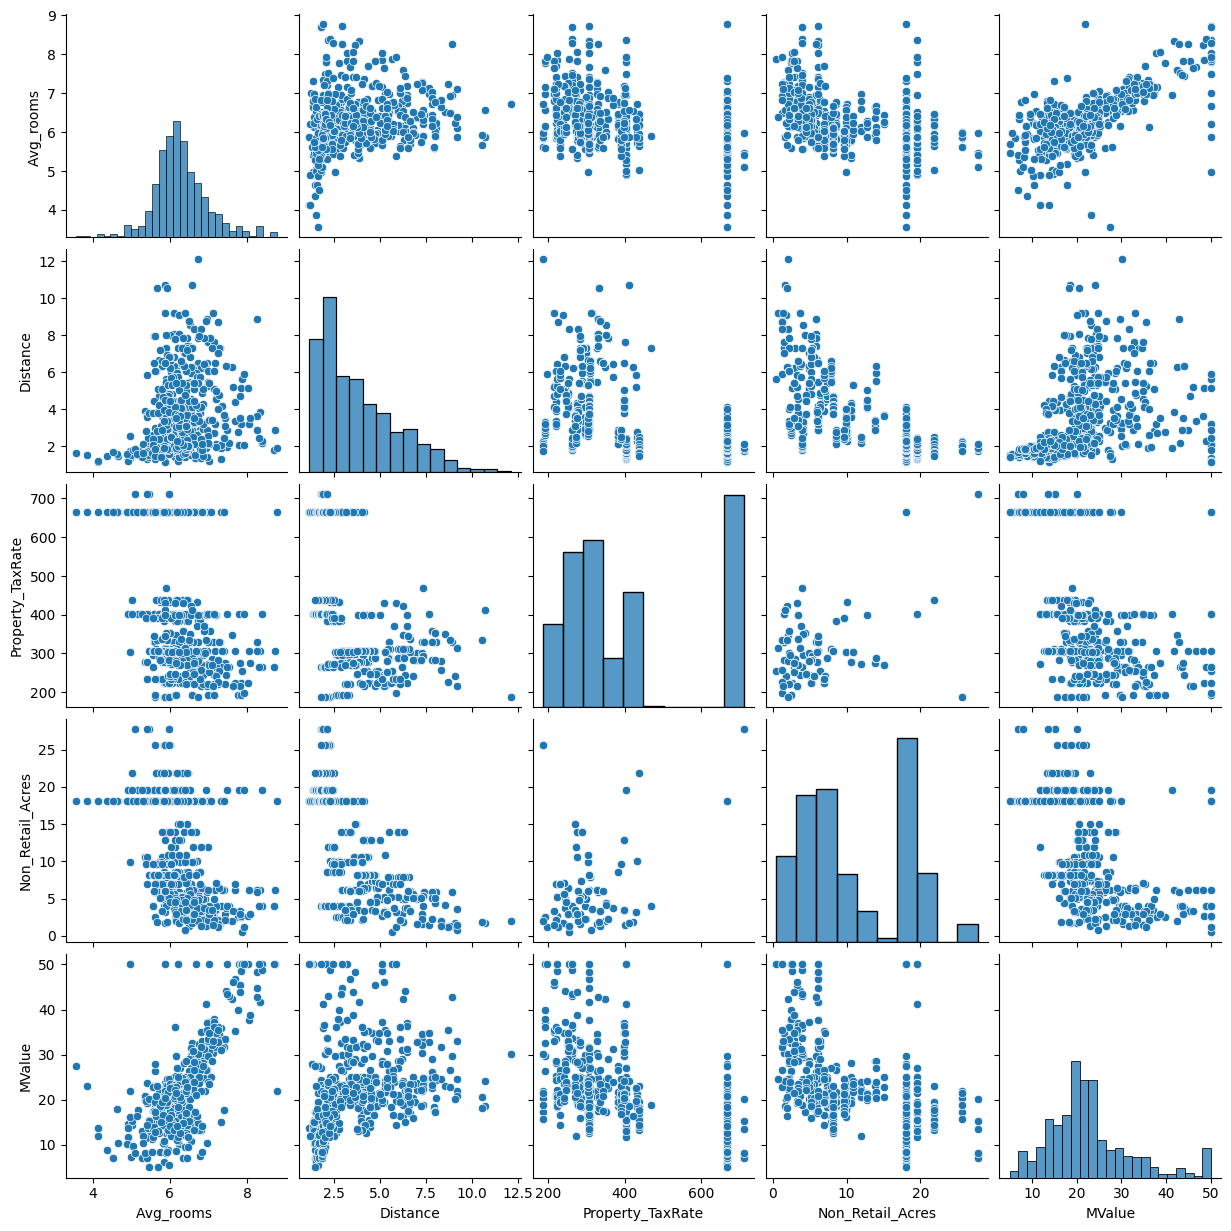

In [72]:
sns.pairplot(df)

In [73]:
x=df[['Avg_rooms ', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']]
y=df['MValue']

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.Series([variance_inflation_factor(x.values,idx)
    for idx in range(x.shape[1])],
    index=x.columns)

print(vif)

Avg_rooms           16.747965
Distance             6.880607
Property_TaxRate    13.861510
Non_Retail_Acres     9.598374
dtype: float64


In [75]:
x=df[[ 'Distance','Non_Retail_Acres']]
print(y)

0      33.2
1      27.5
2      26.5
3      18.6
4      19.3
       ... 
501    10.8
502    11.8
503    14.9
504    12.6
505    14.1
Name: MValue, Length: 506, dtype: float64


In [76]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33,random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(xtrain,ytrain)

print('Interceopt: ',model.intercept_,'\nCoeffiencients',model.coef_)

Interceopt:  38.091225709521446 
Coeffiencients [-1.27856928 -0.9452116 ]


In [78]:
r2_val=model.score(xtrain,ytrain)
r2_val

0.2581499484166435

In [79]:
ypred = model.predict(xtest)

In [80]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(ypred,ytest)
print("The mean sqaured error of the model is:",MSE)

The mean sqaured error of the model is: 55.770639488944795


In [81]:
adjusted_rscore=1 -(1-model.score(xtrain,ytrain))*(len(ytrain)-1)/(len(ytrain)-x.shape[1]-1)
print(adjusted_rscore)

0.25373417430007594
